In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
df = pd.read_csv('labelled-billboard-lyrics-spotify.csv',index_col=0)
df.dropna(inplace=True)

In [ ]:
df.head()

,danceability,energy,loudness,valence,acousticness,instrumentalness,tempo,kmeans
0,0.466,0.3890,-12.825,0.749,0.631,0.843000,92.631,0
1,0.554,0.1860,-15.846,0.200,0.909,0.001440,81.181,0
2,0.498,0.5820,-8.961,0.866,0.412,0.000000,119.809,1
3,0.772,0.2970,-14.679,0.822,0.854,0.000008,119.987,0
4,0.570,0.0636,-18.548,0.282,0.936,0.000000,101.517,0


In [ ]:
X = df.drop(['kmeans'],axis=1)
Y = df['kmeans']
#Normalize the features
X= MinMaxScaler().fit_transform(X)
#Encode the labels (targets)
encoder = LabelEncoder()
encoder.fit(Y)
encoded_y = encoder.transform(Y)
#Split train and test data with a test size of 20%
X_train,X_test,Y_train,Y_test = train_test_split(X,encoded_y,test_size=0.2,random_state=15)

In [ ]:
# sampling the dataset for equal number of labels for 'happy' and 'sad'
oversample = RandomOverSampler()
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Libraries to create the Multi-class Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
#Import tensorflow and disable the v2 behavior and eager mode
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.compat.v1.disable_v2_behavior()

In [ ]:
#Create the model
model = Sequential()
model.add(Dense(16,input_dim=7,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(2,activation='sigmoid'))
#Compile the model using logistic loss function and adam     optimizer, accuracy correspond to the metric displayed
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                128       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 18        
Total params: 282
Trainable params: 282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Train the model with the train data
model.fit(X_train,Y_train,verbose=True, epochs=30, batch_size=64)

Train on 6376 samples
Epoch 1/30
6376/6376 [==============================] - 0s 26us/sample - loss: 0.6306 - acc: 0.7078
Epoch 2/30
6376/6376 [==============================] - 0s 20us/sample - loss: 0.4463 - acc: 0.8998
Epoch 3/30
6376/6376 [==============================] - 0s 18us/sample - loss: 0.2646 - acc: 0.9526
Epoch 4/30
6376/6376 [==============================] - 0s 20us/sample - loss: 0.1742 - acc: 0.9600
Epoch 5/30
6376/6376 [==============================] - 0s 21us/sample - loss: 0.1332 - acc: 0.9619
Epoch 6/30
6376/6376 [==============================] - 0s 19us/sample - loss: 0.1090 - acc: 0.9713
Epoch 7/30
6376/6376 [==============================] - 0s 20us/sample - loss: 0.0948 - acc: 0.9716
Epoch 8/30
6376/6376 [==============================] - 0s 19us/sample - loss: 0.0840 - acc: 0.9776
Epoch 9/30
6376/6376 [==============================] - 0s 19us/sample - loss: 0.0765 - acc: 0.9765
Epoch 10/30
6376/6376 [==============================] - 0s 20us/sample - loss

In [ ]:
y_pred = model.predict(X_test)
y_pred = [np.argmax(item) for item in y_pred]

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


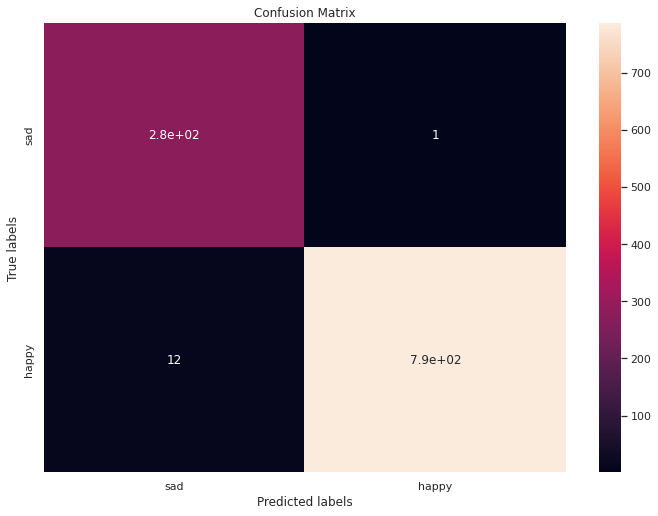

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
#plot the confusion matrix
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
labels = Y.tolist()
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['sad','happy'])
ax.yaxis.set_ticklabels(['sad','happy'])
plt.show()

In [ ]:
scores = precision_recall_fscore_support(Y_test,y_pred)
print("Precision of 'Sad' and 'Happy: {}\nRecall of 'Sad' and 'Happy': {}\n".format(scores[0], scores[1]))

Precision of 'Sad' and 'Happy: [0.95890411 0.99873096]
Recall of 'Sad' and 'Happy': [0.99644128 0.98498123]

